
# Project: Investigate TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I selected TMDB Moive Dataset for my first project 
> This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),
including user ratings and revenue it consist of 21 columns such as id,imdb_id,popularity,budget,revenue .... ect 

>#### **Qusetions can be asked **
>  1.Movies which had most popularity 

>  2.What are the Top 10 Movies!?

>  3.Movies which had most and lowest profit and Budget ? 

>  4.who the most frequent cast ? 

>  5.what is the average budget ?

>  6.what is the averge revenue ? 

>  7. Does movies with a larger budget make more profit?

>  8. Year of release vs Profitability

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df_Movies = pd.read_csv('tmdb-movies.csv')
df_Movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (inspect Data and understand structure )
>
> Removing the duplicated rows if they found 

> Dealing with Null Values 

> Changing release date column to date format

In [3]:
df_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df_Movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df_Movies.duplicated().sum()

1

In [6]:
df_Movies.shape

(10866, 21)

In [7]:
df_Movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Show figure to see where Null values

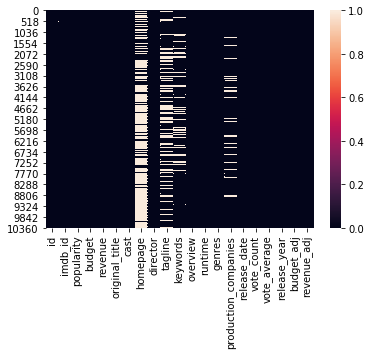

In [8]:
sns.heatmap(df_Movies.isna());

In [9]:
df_Movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Drop Missing Value

In [10]:
#### Drop the  missing values
#### imdb_id , cast , overview , director and genres don't have much null values like homepage , tagline ,keywords and production_companies so will dropna for first and other drop column
df_Movies.dropna(subset=['imdb_id','cast','director','genres','overview'], how='any', inplace = True)
largeNull_columns=['homepage', 'tagline', 'production_companies','keywords']
df_Movies.drop(largeNull_columns,axis=1,inplace=True)


df_Movies.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Budget problem and Revenue 
budget and revenue have values zeros it's like na so we will replace 0 with NA and drop it then 

In [11]:
list=['budget', 'revenue']
rows, col = df_Movies.shape
df_Movies[list] = df_Movies[list].replace(0, np.NAN)
df_Movies.dropna(subset = list, inplace = True)

#### Remove duplicated values


In [12]:
# drop duplicates
df_Movies.drop_duplicates(inplace=True)
df_Movies.duplicated().sum()

0

In [13]:
df_Movies.dtypes

id                  int64
imdb_id            object
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
overview           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

#### Changing the release date column into standard date format

In [14]:
df_Movies.release_date = pd.to_datetime(df_Movies['release_date'])

#### dataset properties after cleaning


In [15]:
df_Movies.shape


(3849, 17)

In [16]:
#### Saving Clean DataSet

In [17]:
df_Movies.to_csv('clean_tmdb_movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis
>  1.Most Popular Movie and Lowest Popular Movie

>  2.What are the Top 10 Movies ?

>  3.Movies which had most and lowest profit and Budget ? 

>  4.who the most frequent cast ? 

>  5.what is the average budget ?

>  6.what is the averge revenue ? 


### Research Question 1 (Most Popular Movie and Lowest Popular )

#### Most Popular

In [18]:
df_clean = pd.read_csv("clean_tmdb_movies.csv")

In [19]:
df_clean.iloc[df_clean['popularity'].idxmax()]['original_title']

'Jurassic World'

#### Lowest Popular

In [20]:
df_clean.iloc[df_clean['popularity'].idxmin()]['original_title']

'Born into Brothels'

### Research Question 2  (What are the Top 10 Movies?)

In [21]:
top10 = pd.DataFrame(df_clean.sort_values('vote_average',ascending=False).head(10))
top10

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2801,24128,tt0088178,0.283191,1200000.0,4.978922e+06,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,David Byrne walks onto the stage and does a so...,88,Documentary|Music,1984-11-16,23,8.4,1984,2.518850e+06,1.045097e+07
1425,278,tt0111161,7.192039,25000000.0,2.834147e+07,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Framed in the 1940s for the double murder of h...,142,Drama|Crime,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07
2554,238,tt0068646,5.738034,6000000.0,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,1972-03-15,3970,8.3,1972,3.128737e+07,1.277914e+09
181,244786,tt2582802,4.780419,3300000.0,1.399309e+07,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,"Under the direction of a ruthless instructor, ...",105,Drama|Music,2014-10-10,2372,8.2,2014,3.039600e+06,1.288891e+07
933,155,tt0468569,8.466668,185000000.0,1.001922e+09,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09
3658,424,tt0108052,2.377288,22000000.0,3.212658e+08,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,The true story of how businessman Oskar Schind...,195,Drama|History|War,1993-11-29,2632,8.1,1993,3.320834e+07,4.849410e+08
3524,240,tt0071562,3.264571,13000000.0,4.754284e+07,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,In the continuing saga of the Corleone crime f...,200,Drama|Crime,1974-12-20,2131,8.1,1974,5.748969e+07,2.102479e+08
1424,680,tt0110912,8.093754,8000000.0,2.139288e+08,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,"A burger-loving hit man, his philosophical par...",154,Thriller|Crime,1994-10-14,5343,8.1,1994,1.176889e+07,3.147131e+08
1426,13,tt0109830,6.715966,55000000.0,6.779454e+08,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,A man with a low IQ has accomplished great thi...,142,Comedy|Drama|Romance,1994-07-06,4856,8.1,1994,8.091114e+07,9.973333e+08
696,550,tt0137523,8.947905,63000000.0,1.008538e+08,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,Drama,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08


#### Plot the Top 10 Movies by Rating


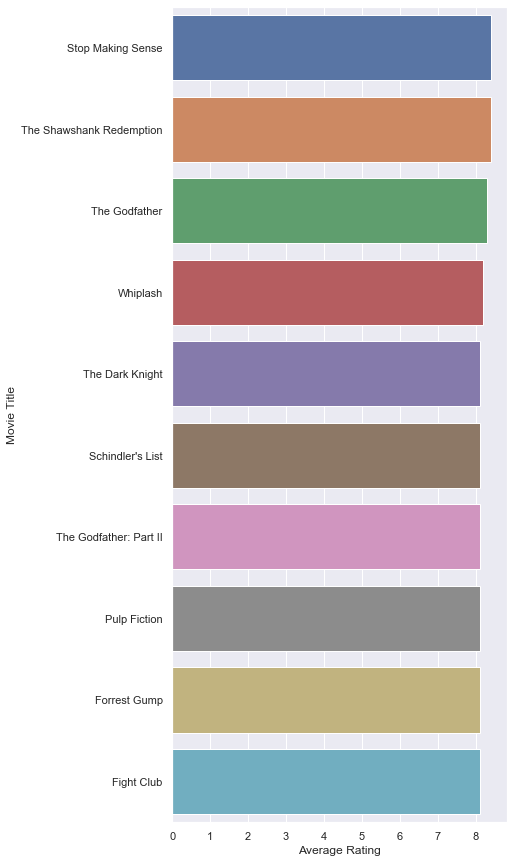

In [22]:
#Plot the top 10 movies
sns.set(style="darkgrid");
sns.set(font_scale=1);
f, ax = plt.subplots(figsize=(6, 15));
sns.barplot(x='vote_average', y='original_title', data=top10);
ax.set( ylabel="Movie Title", xlabel="Average Rating");

>The figure Show the top 10 Movies by Rating

### Research Question 3  (Movies which had most and lowest profit and Budget ?)

In [24]:
df_clean.insert(2,'profit_earned',df_clean['revenue']-df_clean['budget'])


#### higest Profit

In [25]:
df_clean.iloc[df_clean['profit_earned'].idxmax()]['original_title']

'Avatar'

#### Lowest Profit

In [26]:
df_clean.iloc[df_clean['profit_earned'].idxmin()]['original_title']

"The Warrior's Way"

#### Higest Budget

In [27]:
df_clean.iloc[df_clean['budget'].idxmax()]['original_title']

"The Warrior's Way"

#### Lowest Budget


In [28]:
df_clean.iloc[df_clean['budget'].idxmin()]['original_title']

'Lost & Found'

### Research Question 4  (who the most frequent cast ?)

In [29]:
df_clean.columns

Index(['id', 'imdb_id', 'profit_earned', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'director', 'overview', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [30]:
profit_data = df_clean[df_clean['profit_earned'] >= 50000000]

In [31]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 3832
Data columns (total 18 columns):
id                1338 non-null int64
imdb_id           1338 non-null object
profit_earned     1338 non-null float64
popularity        1338 non-null float64
budget            1338 non-null float64
revenue           1338 non-null float64
original_title    1338 non-null object
cast              1338 non-null object
director          1338 non-null object
overview          1338 non-null object
runtime           1338 non-null int64
genres            1338 non-null object
release_date      1338 non-null object
vote_count        1338 non-null int64
vote_average      1338 non-null float64
release_year      1338 non-null int64
budget_adj        1338 non-null float64
revenue_adj       1338 non-null float64
dtypes: float64(7), int64(4), object(7)
memory usage: 198.6+ KB


In [32]:
#function which will take any column as argument from and keep its track
def calcultaion(column):
    #here take a column theb separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
   
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #Descending order
    count = data.value_counts(ascending = False)
    
    return count

In [33]:
count = calcultaion('cast')
count.head(5)

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> As expecteted Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.  


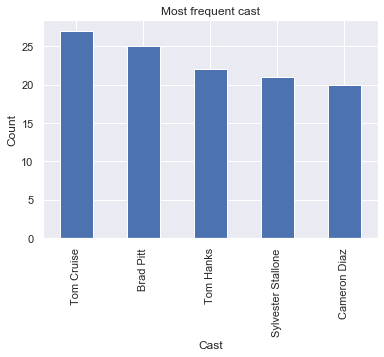

In [50]:
fig = plt.figure()
count.head(5).plot(kind='bar',title="Most frequent cast");
plt.xlabel('Cast');
plt.ylabel ('Count');


> Here the Figure show the Top 5 Cast 

### Research Question 5  (what is the Average Budget ?)

In [51]:
profit_data['budget'].mean()

60444957.76083707

> So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.


### Research Question 6  (what is the Average revenue ?)

In [53]:
profit_data['revenue'].mean()

254957662.59491777

>So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

### Research Question 7 (Does movies with a larger budget make more profit?)

In [55]:
df_clean.columns

Index(['id', 'imdb_id', 'profit_earned', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'director', 'overview', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

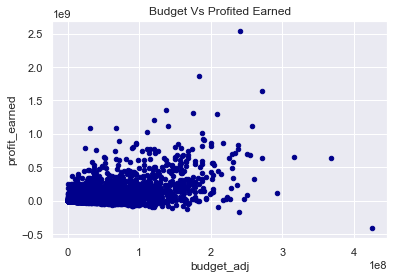

In [62]:
fig=plt.figure();
df_clean.plot.scatter(x='budget_adj',y='profit_earned',c='DarkBlue',title="Budget Vs Profited Earned");


> from figure we see budget with large number get more profit 

### Research Question 8 : Year of release vs Profitability

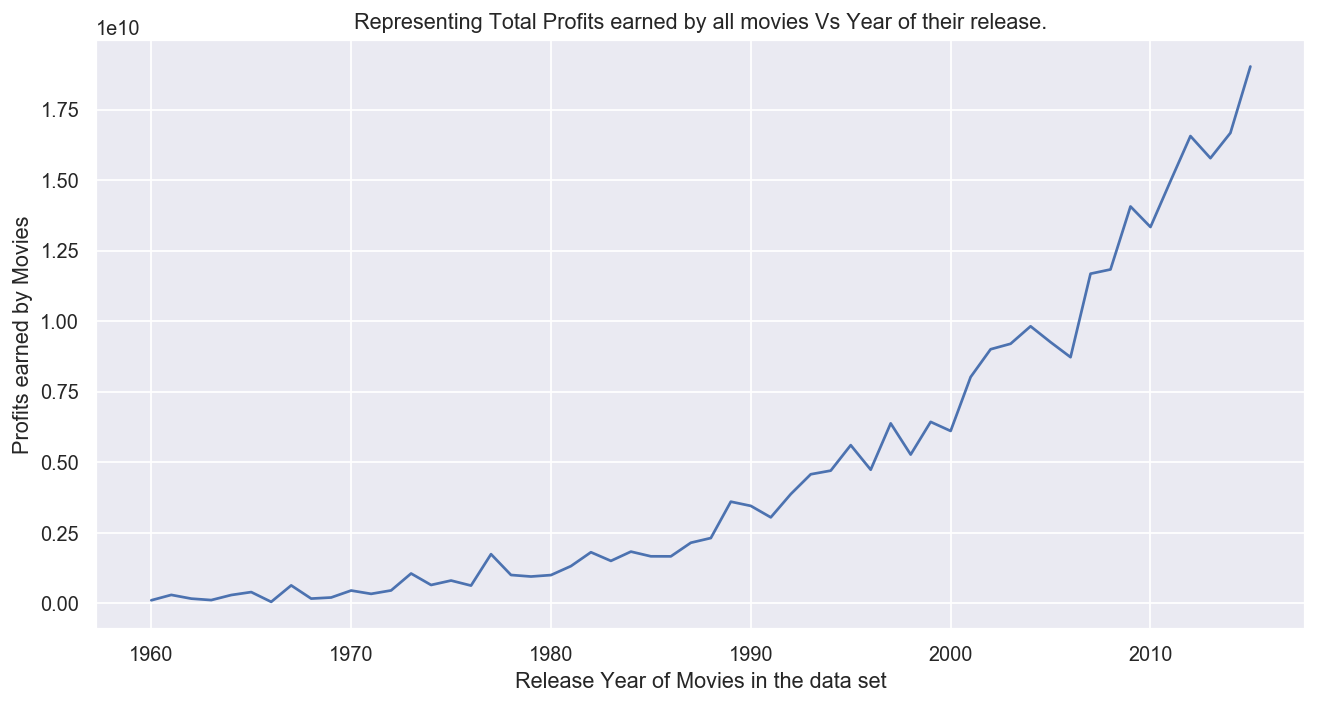

In [65]:
profits_year = df_clean.groupby('release_year')['profit_earned'].sum()
#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [67]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

> So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.
>
>We are now done with analysing the given dataset.We will now find characteristics of profitable movies.



<a id='conclusions'></a>
## Conclusions
#### Summary
> **From the investegated data set "TMDb Movie Data", the follwing questions were explored:**

>  1.Most Popular Movie and Lowest Popular Movie

>  2.What are the Top 10 Movies ?

>  3.Movies which had most and lowest profit and Budget ? 

>  4.who the most frequent cast ? 

>  5.what is the average budget ?

>  6.what is the averge revenue ? 

>  7. Does movies with a larger budget make more profit?

>  8. Year of release vs Profitability 


**Data Wrangling:**
* Features with missing values were cleaned
* 1 duplicated row was removed
* A clean dataset was saved in "clean_tmdb_movies.csv" 


#### Analysis and Results

> 1.Most Popular Movie and Lowest Popular Movie?

 Most Popular Movie    :: 'Jurassic World'
 
 Lowest Popular Movie  :: 'Born into Brothels'
 
> 2.What are the Top 10 Movies ?

        1. The Godfather
        2. Whiplash
        3. Bill Cunningham New York
        4. Fight Club
        5. The Dark Knight
        6. Kill Bill: The Whole Bloody Affair
        7. Schindler's List
        8. Inside Out 
        9. Room 
        10.Intersteller
 
> 2.Movies which had most and lowest profit and Budget ?
 
higest Profit "Avatar"

Lowest Profit "The Warrior's Way"

higest Budget  "The Warrior's Way"

lowest Budget   "Lost & Found"

>  4.who the most frequent cast ? 
    
    Tom Cruise            27
    
    Brad Pitt             25
    
    Tom Hanks             22
    
    Sylvester Stallone    21
    
    Cameron Diaz          20

>  5.what is the average budget ?

the movies having profit of 50 million dollar and more have an average budget of 60 million dollar

>  6.what is the averge revenue ?  

The movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

> 7. Does movies with a larger budget make more profit?
yes

> 8. Year of release vs Profitability

from the figure the profit increase when year increase